In [2]:
import torch 
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt


d:\programfiles\Anaconda\anaconda\lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: '[WinError 127] 找不到指定的程序。'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


In [3]:
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

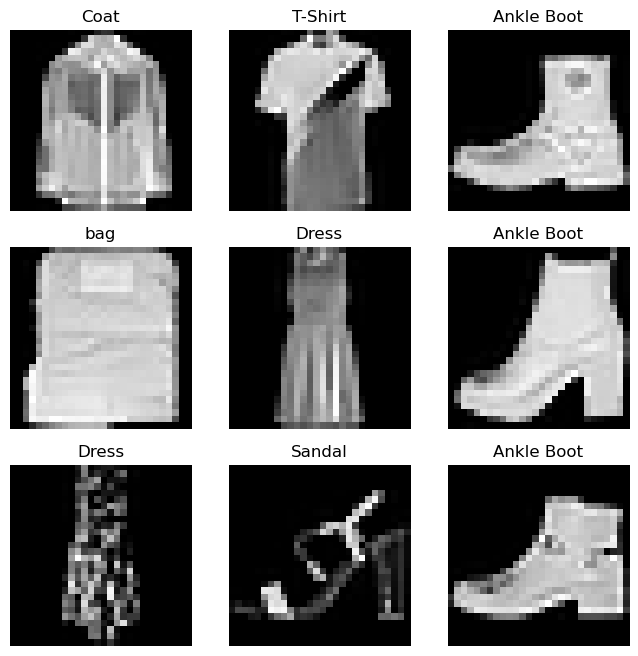

In [4]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "bag",
    9: "Ankle Boot"
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1, )).item()  # 随机采样一个
    img, label = training_data[sample_idx]  # 获取对应的图片
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

# Creating a Custom Dataset for ours files
need 3 functions: `__init__`, `__len__`, `__getitem__`

for FashionMNIST:
1. images are stored in a directory `img_dir`
2. labels are stored in a CSV file `annotations_file` : annotations: 注解
3. targe_transform & transform：may be a function

In [5]:
import os 
import pandas as pd
from torchvision.io import read_image


In [6]:
class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None) -> None:
        super().__init__()
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform
    
    def __len__(self):
        return len(self.img_labels)
    
    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)  # 把图片读入，作为tensor
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return 0

# `__init__`

Run once, only when instatiating the Dataset object.

The labels.csv file look like:

 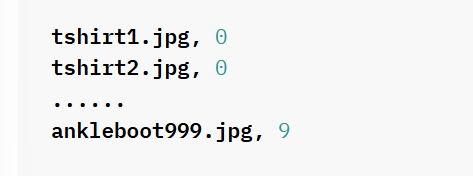


# `__len__`
Returns the number of samples in our dataset.

# `__getitem__`
When we give an index `idx`, this function :
1. loads and returns a sample from the dataset, and 
2. converts it to a `tensor` by using `read_image`, 
3. retrieves the corresponding label from csv data in `self.img_labels`
4. calls the transform functions on them(if applicate).
return : the tensor image & corresponding label in a `tuple`


# Preparing u data for training with DataLoaders
We can get just one sample at a time from `Dataset`.

While training a model, we typically want to pass samples in `minibatches`, and reshuffle the data at every epoch to **reduce model overfitting**.

May be can use `multiprocessing` to speed up data retrieval.

In [7]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)


# Iterate through the DataLoader
Each iteration below, returns a batch of `train_features` and `train_labels`.

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])
img Shape: torch.Size([28, 28])


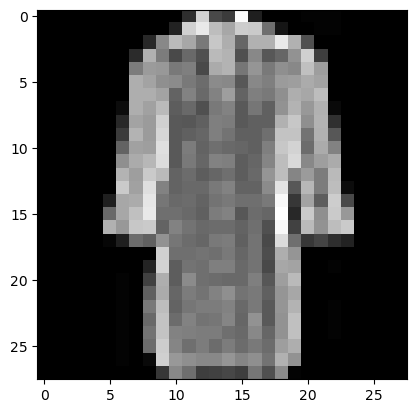

Label: 6


In [ ]:
# Display image and label
train_features, train_labels = next(iter(train_dataloader))
print(f'Feature batch shape: {train_features.size()}')
print(f'Labels batch shape: {train_labels.size()}')
img = train_features[0].squeeze()  # 删除train_features[0]的第一个维度
print(f'img Shape: {img.size()}')
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f'Label: {label}')


For the output: `Feature batch shape: torch.Size([64, 1, 28, 28])`:

the first demensionality 64 is `batch_size`,

the second demensionality 1 is `one batch just have one image`,

the last two demensionality [28, 28] is `each img's size is 28 * 28`